# Clustering Challenge

Clustering is an unsupervised machine learning technique in which you train a model to group similar entities into clusters based on their features.

In this exercise, you must separate a dataset consisting of three numeric features (A, B, and C) into clusters. Run the cell below to load the data.

In [1]:
import pandas as pd
data = pd.read_csv('clusters.csv')

features = data
features.sample(10)

,A,B,C
431,-0.521067,0.164107,-0.511950
152,0.529886,0.084030,-0.077911
358,3.354475,4.286457,3.669965
170,0.354911,-0.181515,0.603814
538,2.004312,1.504445,2.482960
375,0.620723,0.037740,-0.026305
948,2.831173,3.433967,1.682870
946,-0.266454,-0.463507,0.339713
872,2.005210,2.507513,1.437472
531,-0.275029,0.301513,-0.391271


In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Normalize the numeric features so they're on the same scale
scaled_features = MinMaxScaler().fit_transform(features[data.columns[0:3]])

# Get two principal components
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]

array([[ 0.38631524, -0.05515159],
       [ 0.5679739 , -0.06144958],
       [-0.2979762 ,  0.08474023],
       [-0.46052216,  0.11460533],
       [ 0.44134723, -0.16034683],
       [ 0.42096717, -0.06126763],
       [-0.57863184,  0.07164111],
       [-0.14035181,  0.10637315],
       [ 0.47575131,  0.13633551],
       [ 0.57024335,  0.0206122 ]])

Now that we have the data points translated to two dimensions, we can visualize them in a plot:

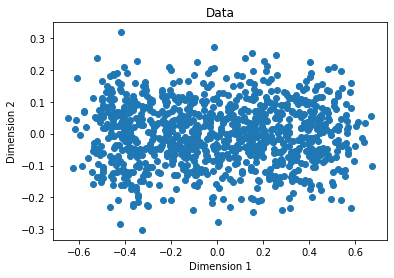

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(features_2d[:,0],features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()

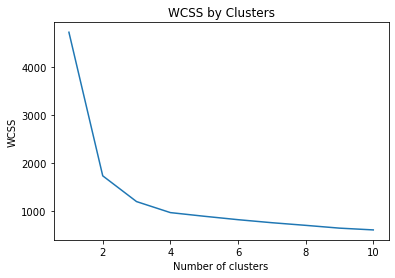

In [4]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

# Create 10 models with 1 to 10 clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    # Fit the data points
    kmeans.fit(features.values)
    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)
    
#Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
from sklearn.cluster import KMeans

# Create a model based on 3 centroids
model = KMeans(n_clusters=4, init='k-means++', n_init=100, max_iter=1000)
# Fit to the data and predict the cluster assignments for each data point
km_clusters = model.fit_predict(features.values)
# View the cluster assignments
km_clusters

array([1, 1, 2, 2, 1, 1, 2, 3, 1, 1, 2, 0, 0, 3, 3, 3, 2, 0, 3, 3, 1, 3,
       1, 1, 3, 0, 2, 1, 0, 3, 0, 1, 2, 3, 3, 1, 3, 3, 1, 3, 3, 3, 2, 0,
       2, 1, 1, 2, 2, 3, 1, 0, 2, 2, 2, 2, 3, 1, 2, 1, 1, 1, 1, 1, 3, 3,
       0, 3, 0, 2, 0, 3, 3, 2, 0, 3, 3, 3, 1, 0, 3, 0, 2, 0, 3, 2, 0, 3,
       3, 0, 0, 0, 2, 3, 0, 3, 2, 3, 2, 0, 3, 0, 2, 0, 3, 0, 2, 3, 3, 2,
       3, 0, 1, 1, 0, 2, 0, 2, 1, 0, 3, 0, 2, 2, 1, 3, 0, 3, 2, 1, 0, 0,
       0, 3, 0, 0, 3, 1, 3, 0, 1, 0, 0, 1, 2, 2, 3, 2, 3, 3, 2, 1, 1, 3,
       1, 0, 1, 3, 3, 3, 0, 1, 2, 2, 3, 0, 0, 1, 1, 2, 1, 0, 3, 2, 3, 0,
       0, 3, 3, 1, 3, 1, 0, 0, 3, 2, 1, 2, 2, 0, 0, 1, 0, 3, 2, 0, 3, 3,
       1, 2, 0, 2, 2, 2, 1, 1, 2, 3, 2, 1, 2, 2, 0, 1, 2, 3, 3, 2, 1, 2,
       3, 1, 0, 2, 0, 3, 0, 1, 0, 1, 3, 1, 0, 3, 1, 2, 2, 1, 2, 0, 2, 0,
       2, 3, 3, 0, 2, 1, 1, 3, 2, 3, 0, 0, 2, 2, 2, 1, 2, 1, 3, 2, 2, 3,
       1, 3, 0, 0, 0, 3, 2, 1, 3, 0, 1, 0, 2, 3, 3, 1, 2, 2, 0, 1, 1, 2,
       2, 0, 2, 1, 1, 0, 1, 2, 2, 2, 3, 3, 0, 1, 2,

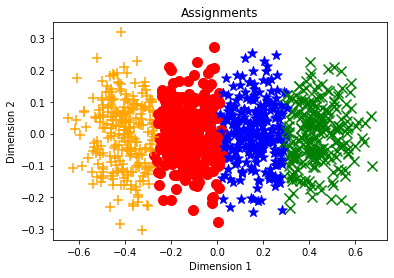

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange',3:'red'}
    mrk_dic = {0:'*',1:'x',2:'+', 3:'o'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(features_2d, km_clusters)

In [11]:
from sklearn.cluster import AgglomerativeClustering

agg_model = AgglomerativeClustering(n_clusters=4)
agg_clusters = agg_model.fit_predict(data)
agg_clusters

array([1, 1, 2, 0, 1, 1, 0, 2, 1, 1, 0, 3, 3, 2, 0, 2, 2, 3, 3, 2, 1, 2,
       1, 1, 2, 1, 0, 1, 1, 2, 3, 1, 0, 2, 2, 1, 3, 2, 1, 3, 2, 2, 0, 3,
       0, 1, 1, 0, 0, 2, 1, 3, 2, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2,
       3, 2, 3, 0, 3, 2, 2, 0, 3, 2, 3, 2, 1, 2, 2, 3, 0, 3, 2, 0, 3, 2,
       2, 3, 3, 3, 2, 2, 3, 2, 0, 0, 0, 3, 2, 3, 0, 3, 2, 3, 0, 3, 2, 0,
       2, 3, 1, 1, 3, 0, 3, 0, 1, 3, 2, 3, 0, 2, 1, 2, 3, 2, 0, 1, 3, 3,
       2, 2, 3, 3, 2, 1, 2, 3, 1, 3, 2, 1, 0, 0, 2, 0, 2, 2, 0, 1, 1, 2,
       1, 3, 1, 2, 2, 2, 1, 1, 0, 0, 2, 3, 3, 1, 1, 0, 1, 3, 2, 0, 2, 1,
       3, 2, 3, 1, 2, 1, 2, 3, 3, 0, 1, 2, 0, 3, 3, 1, 3, 2, 0, 3, 2, 2,
       1, 0, 3, 0, 0, 0, 1, 1, 2, 2, 0, 1, 0, 2, 3, 1, 0, 3, 2, 0, 1, 0,
       2, 1, 1, 0, 3, 2, 3, 1, 3, 1, 2, 1, 3, 2, 1, 0, 0, 1, 2, 3, 2, 3,
       0, 2, 2, 1, 0, 1, 1, 3, 0, 2, 3, 1, 0, 0, 0, 1, 0, 1, 2, 0, 2, 2,
       1, 2, 3, 1, 3, 2, 0, 1, 2, 3, 1, 3, 0, 2, 2, 1, 0, 0, 3, 1, 1, 0,
       0, 3, 0, 1, 1, 3, 1, 2, 0, 0, 2, 2, 3, 1, 2,

# View the agglomerative cluster assignments

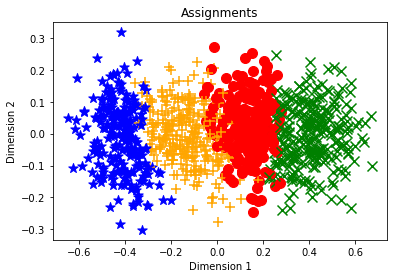

In [12]:
plot_clusters(features_2d, agg_clusters)

## Quick Summary
Found that there are approximately 3-4 clusters and the groups were separated appropriately.